In [1]:
### table of predictors
# load predictors
import importlib.util
from re import M
spec_config = importlib.util.spec_from_file_location("config_module", "5_config.py")
config_module = importlib.util.module_from_spec(spec_config)
spec_config.loader.exec_module(config_module)
MAOC_config = config_module.MAOC_config
MIC_config = config_module.MIC_config
BD_config = config_module.BD_config
dOC_config = config_module.dOC_config
dMAOC_config = config_module.dMAOC_config
dMIC_config = config_module.dMIC_config
pred_config_OC_2009 = config_module.pred_config_OC_2009
pred_config_OC_2015 = config_module.pred_config_OC_2015
pred_config_OC_2018 = config_module.pred_config_OC_2018
pred_config_Cmic_2009 = config_module.pred_config_Cmic_2009
pred_config_Cmic_2015 = config_module.pred_config_Cmic_2015
pred_config_Cmic_2018 = config_module.pred_config_Cmic_2018
pred_config_BD_2009 = config_module.pred_config_BD_2009
pred_config_BD_2015 = config_module.pred_config_BD_2015
pred_config_BD_2018 = config_module.pred_config_BD_2018
pred_config_dOC_15_18 = config_module.pred_config_dOC_15_18
pred_config_dOC_sc_g_kg_15_18_median = config_module.pred_config_dOC_sc_g_kg_15_18_median
pred_config_dCmic_15_18_median = config_module.pred_config_dCmic_15_18_median
# load accuracies + uncertainty
import pickle
def r2_stats_by_model(results_df, r2_col="test_R2", model_col="model_type"):
    """Return median/std of R2 for each model type."""
    return (results_df.groupby(model_col, dropna=False)[r2_col]
        .agg(median="median", std="std")
        .reset_index())
bd_2018_stats = r2_stats_by_model(pickle.load(open("5_results/5_BD 0-20_2018_results.pkl", "rb")))
cmic_2018_stats = r2_stats_by_model(pickle.load(open("5_results/5_Cmic_2018_results.pkl", "rb")))
oc_sc_g_kg_2009_stats = r2_stats_by_model(
    pickle.load(open("5_results/5_OC_sc_g_kg_2009_results.pkl", "rb"))
)
dcmic_15_18_median_stats = r2_stats_by_model(pickle.load(open("5_results/5_dCmic_15_18_median_results.pkl", "rb")))
doc_15_18_stats = r2_stats_by_model(pickle.load(open("5_results/5_dOC_15_18_results.pkl", "rb")))
doc_sc_g_kg_15_18_median_stats = r2_stats_by_model(pickle.load(open("5_results/5_dOC_sc_g_kg_15_18_median_results.pkl", "rb")))
# create table
import pandas as pd

def predictors_from_config(cfg):
    predictors = []
    for key in ("normal", "log"):
        predictors.extend(cfg.get("predictors", {}).get(key, []))
    return predictors

train_configs = {
    "MAOC": MAOC_config,
    "MIC": MIC_config,
    "BD": BD_config,
    "dOC": dOC_config,
    "dMAOC": dMAOC_config,
    "dMIC": dMIC_config,
}

pred_configs = {
    "OC_sc_g_kg_2015": pred_config_OC_2015,
    "OC_sc_g_kg_2018": pred_config_OC_2018,
    "Cmic_2015": pred_config_Cmic_2015,
    "Cmic_2018": pred_config_Cmic_2018,
    "BD_2015": pred_config_BD_2015,
    "BD_2018": pred_config_BD_2018,
    "dOC_15_18": pred_config_dOC_15_18,
    "dOC_sc_g_kg_15_18_median": pred_config_dOC_sc_g_kg_15_18_median,
    "dCmic_15_18_median": pred_config_dCmic_15_18_median,
}

stats_by_target = {
    "BD 0-20_2018": bd_2018_stats,
    "Cmic_2018": cmic_2018_stats,
    "OC_sc_g_kg_2009": oc_sc_g_kg_2009_stats,
    "dCmic_15_18_median": dcmic_15_18_median_stats,
    "dOC_15_18": doc_15_18_stats,
    "dOC_sc_g_kg_15_18_median": doc_sc_g_kg_15_18_median_stats,
}

all_configs = {**train_configs, **pred_configs}

target_to_predictors = {
    cfg["target_name"]: set(predictors_from_config(cfg))
    for cfg in all_configs.values()
}

AE_gps2018_2017 = [f"AE{str(i).zfill(2)}_2018gps_2017" for i in range(64)]
AE_gps2018_2018 = [f"AE{str(i).zfill(2)}_2018gps_2018" for i in range(64)]
Bioclim_gps2009 = [f"BIOCLIM_2009gps_{i+1}" for i in range(19)]
Bioclim_gps2015 = [f"BIOCLIM_2015gps_{i+1}" for i in range(19)]
Bioclim_gps2018 = [f"BIOCLIM_2018gps_{i+1}" for i in range(19)]
texture = ["Clay", "Silt", "Sand", "Coarse"]
LUCAS_2009 = [
    f"{var}_2009"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
LUCAS_2015 = [
    f"{var}_2015"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
LUCAS_2018 = [
    f"{var}_2018"
    for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]
]
Ox = ["Ox_Al_2018", "Ox_Fe_2018"]
MNPP_gps2009_2009m2 = [f"MODIS_NPP_2009gps_{y}" for y in range(2009, 2009 - 3, -1)]
MNPP_gps2015_2015m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2015, 2015 - 3, -1)]
MNPP_gps2015_2018m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2018, 2018 - 3, -1)]
MNPP_gps2018_2018m2 = [f"MODIS_NPP_2018gps_{y}" for y in range(2018, 2018 - 3, -1)]

group_definitions = {
    "AE_gps2018_2017": AE_gps2018_2017,
    "AE_gps2018_2018": AE_gps2018_2018,
    "Bioclim_gps2009": Bioclim_gps2009,
    "Bioclim_gps2015": Bioclim_gps2015,
    "Bioclim_gps2018": Bioclim_gps2018,
    "Texture": texture,
    "LUCAS_2009": LUCAS_2009,
    "LUCAS_2015": LUCAS_2015,
    "LUCAS_2018": LUCAS_2018,
    "Ox": Ox,
    "MNPP_gps2009_2009m2": MNPP_gps2009_2009m2,
    "MNPP_gps2015_2015m2": MNPP_gps2015_2015m2,
    "MNPP_gps2015_2018m2": MNPP_gps2015_2018m2,
    "MNPP_gps2018_2018m2": MNPP_gps2018_2018m2,
}

group_columns = list(group_definitions.keys())

model_types = sorted(
    {
        model
        for stats_df in stats_by_target.values()
        for model in stats_df["model_type"].dropna().unique()
    }
)

rows = []
for target_name, stats_df in stats_by_target.items():
    predictors = target_to_predictors.get(target_name, set())
    row = {
        "row_type": "model_accuracy",
        "target_name": target_name,
    }
    for model_type in model_types:
        model_stats = stats_df[stats_df["model_type"] == model_type]
        if not model_stats.empty:
            row[f"{model_type}_r2_median"] = model_stats["median"].iloc[0]
            row[f"{model_type}_r2_std"] = model_stats["std"].iloc[0]
        else:
            row[f"{model_type}_r2_median"] = float("nan")
            row[f"{model_type}_r2_std"] = float("nan")
    row.update(
        {
            group: all(pred in predictors for pred in preds)
            for group, preds in group_definitions.items()
        }
    )
    rows.append(row)

for pred_key, cfg in pred_configs.items():
    predictors = set(predictors_from_config(cfg))
    row = {
        "row_type": "predictor_only",
        "target_name": cfg["target_name"],
    }
    for model_type in model_types:
        row[f"{model_type}_r2_median"] = float("nan")
        row[f"{model_type}_r2_std"] = float("nan")
    row.update(
        {
            group: all(pred in predictors for pred in preds)
            for group, preds in group_definitions.items()
        }
    )
    rows.append(row)

accuracy_cols = []
for model_type in model_types:
    accuracy_cols.extend([f"{model_type}_r2_median", f"{model_type}_r2_std"])

accuracy_predictor_table = pd.DataFrame(
    rows,
    columns=[
        "row_type",
        "target_name",
        *accuracy_cols,
        *group_columns,
    ],
)

row_type_order = ["model_accuracy", "predictor_only"]
accuracy_predictor_table["row_type"] = pd.Categorical(
    accuracy_predictor_table["row_type"],
    categories=row_type_order,
    ordered=True,
)

model_target_order = list(stats_by_target.keys())
base_order = [
    name.rsplit("_", 1)[0] if "_" in name else name
    for name in model_target_order
]

def base_target(name):
    if name.startswith("BD 0-20_"):
        return "BD 0-20"
    if name.startswith("Cmic_"):
        return "Cmic"
    if name.startswith("OC_sc_g_kg_"):
        return "OC_sc_g_kg"
    if name.startswith("dCmic_"):
        return "dCmic"
    if name.startswith("dOC_sc_g_kg_"):
        return "dOC_sc_g_kg"
    if name.startswith("dOC_"):
        return "dOC"
    return name.rsplit("_", 1)[0] if "_" in name else name

base_order = [base_target(name) for name in model_target_order]
base_rank = {base: idx for idx, base in enumerate(base_order)}

accuracy_predictor_table["base_target"] = accuracy_predictor_table[
    "target_name"
].map(base_target)
accuracy_predictor_table["base_rank"] = accuracy_predictor_table[
    "base_target"
].map(base_rank)
accuracy_predictor_table["base_rank"] = accuracy_predictor_table[
    "base_rank"
].fillna(len(base_rank))

accuracy_predictor_table = accuracy_predictor_table.sort_values(
    ["base_rank", "row_type", "target_name"],
    kind="mergesort",
).reset_index(drop=True)

accuracy_predictor_table = accuracy_predictor_table.drop(
    columns=["base_target", "base_rank"]
)

AE_gps2018_2017 = [f"AE{str(i).zfill(2)}_2018gps_2017" for i in range(64)]
AE_gps2018_2018 = [f"AE{str(i).zfill(2)}_2018gps_2018" for i in range(64)]
Bioclim_gps2009 = [f"BIOCLIM_2009gps_{i+1}" for i in range(19)]
Bioclim_gps2015 = [f"BIOCLIM_2015gps_{i+1}" for i in range(19)]
Bioclim_gps2018 = [f"BIOCLIM_2018gps_{i+1}" for i in range(19)]
texture = ["Clay", "Silt", "Sand", "Coarse"]
LUCAS_2009 = [f"{var}_2009" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
LUCAS_2015 = [f"{var}_2015" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
LUCAS_2018 = [f"{var}_2018" for var in ["CKr", "CNr", "CPr", "CaCO3_c", "Calc", "K", "N", "OC", "P", "pH", "pH_c"]]
Ox = ["Ox_Al_2018", "Ox_Fe_2018"]
MNPP_gps2009_2009m2 = [f"MODIS_NPP_2009gps_{y}" for y in range(2009, 2009-3, -1)]
MNPP_gps2015_2015m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2015, 2015-3, -1)]
MNPP_gps2015_2018m2 = [f"MODIS_NPP_2015gps_{y}" for y in range(2018, 2018-3, -1)]
MNPP_gps2018_2018m2 = [f"MODIS_NPP_2018gps_{y}" for y in range(2018, 2018-3, -1)]

# create tex

import pandas as pd


def _latex_escape(text):
    return (
        str(text)
        .replace("\\", "\\textbackslash{}")
        .replace("_", "\\_")
        .replace("%", "\\%")
        .replace("&", "\\&")
        .replace("#", "\\#")
    )


def _format_value(value):
    if pd.isna(value):
        return ""
    if isinstance(value, bool):
        return "1" if value else "0"
    if isinstance(value, (int, float)):
        return f"{value:.2f}" if isinstance(value, float) else str(value)
    return _latex_escape(value)


def _model_label(model_type):
    normalized = model_type.replace("_", " ")
    replacements = {
        "Piecewise Linear Reg": "Piecewise Linear",
        "Piecewise Linear": "Piecewise Linear",
        "DecisionTree": "DecisionTree",
        "LinReg": "LinReg",
    }
    label = replacements.get(normalized, normalized)
    return _latex_escape(label)



def _group_label(group_name):
    words = group_name.replace("_", " ").split()
    stacked = r"\\".join(_latex_escape(word) for word in words)
    return f"\\shortstack{{{stacked}}}"


def generate_accuracy_predictor_table(df, model_types, group_columns):
    accuracy_cols = []
    for model_type in model_types:
        accuracy_cols.extend([f"{model_type}_r2_median", f"{model_type}_r2_std"])

    accuracy_count = len(accuracy_cols)
    predictor_count = len(group_columns)
    col_def = "l|" + "|".join(["cc"] * len(model_types)) + "|" + ("c" * predictor_count)

    lines = []
    lines.append("{\\renewcommand{\\arraystretch}{1.35}")
    lines.append(f"\\begin{{tabular}}{{{col_def}}}")
    lines.append("\\hline")
    lines.append("\\multirow{3}{*}{Predicted} ")
    lines.append(f"& \\multicolumn{{{accuracy_count}}}{{c|}}{{Accuracy}}")
    lines.append(
        f"& \\multicolumn{{{predictor_count}}}{{c}}{{Predictors}} " + "\\\\"
    )
    lines.append(f"\\cline{{2-{1 + accuracy_count + predictor_count}}}")
    lines.append("")

    header_line = " & " + "\n& ".join(
        [f"\\multicolumn{{2}}{{c|}}{{{_model_label(model_type)}}}" for model_type in model_types]
        + [f"\\multirow{{2}}{{*}}{{{_group_label(group)}}}" for group in group_columns]
    )
    lines.append(header_line + " " + "\\\\")
    lines.append(f"\\cline{{2-{1 + accuracy_count}}}")
    lines.append("")

    metric_lines = []
    for _ in model_types:
        metric_lines.append("$\\widetilde{R^{2}}$ & $\\sigma(R^{2})$")
    blank_predictors = " & ".join([""] * predictor_count)
    if blank_predictors:
        metric_lines.append(blank_predictors)
    metrics_line = " & " + "\n& ".join(metric_lines)
    lines.append(metrics_line + " " + "\\\\")
    lines.append("\\hline")
    lines.append("")

    for idx, (_, row) in enumerate(df.iterrows()):
        if idx % 2 == 1:
            lines.append("\\rowcolor{gray!15}")
        row_cells = [_latex_escape(row["target_name"])]
        for col in accuracy_cols:
            row_cells.append(_format_value(row[col]))
        for col in group_columns:
            row_cells.append(_format_value(row[col]))
        lines.append(" & ".join(row_cells) + " " + "\\\\")
        lines.append("")

    lines.append("\\hline")
    lines.append("\\end{tabular}")
    lines.append("}")
    return "\n".join(lines) + "\n"


latex_code = generate_accuracy_predictor_table(
    accuracy_predictor_table,
    model_types,
    group_columns,
)
with open("figures/accuracy_predictor_table.tex", "w") as f:
    f.write(latex_code)

accuracy_predictor_table

,row_type,target_name,DecisionTree_r2_median,DecisionTree_r2_std,LinReg_r2_median,LinReg_r2_std,Piecewise_Linear_Reg_r2_median,Piecewise_Linear_Reg_r2_std,AE_gps2018_2017,AE_gps2018_2018,...,Bioclim_gps2018,Texture,LUCAS_2009,LUCAS_2015,LUCAS_2018,Ox,MNPP_gps2009_2009m2,MNPP_gps2015_2015m2,MNPP_gps2015_2018m2,MNPP_gps2018_2018m2
0,model_accuracy,BD 0-20_2018,0.355008,0.051096,0.387767,0.022584,0.427899,0.019202,True,True,...,True,True,False,False,True,True,False,False,False,True
1,predictor_only,BD 0-20_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
2,predictor_only,BD 0-20_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
3,model_accuracy,Cmic_2018,0.239987,0.264704,0.406759,0.029002,0.439865,0.051497,True,True,...,True,True,False,False,True,True,False,False,False,True
4,predictor_only,Cmic_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
5,predictor_only,Cmic_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
6,model_accuracy,OC_sc_g_kg_2009,0.809756,0.086449,0.435036,0.162565,0.849740,0.213213,True,True,...,False,True,True,False,False,True,True,False,False,False
7,predictor_only,OC_sc_g_kg_2015,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,False,True,False,True,False,True,False,True,False,False
8,predictor_only,OC_sc_g_kg_2018,NaN,NaN,NaN,NaN,NaN,NaN,True,True,...,True,True,False,False,True,True,False,False,False,True
9,model_accuracy,dCmic_15_18_median,-0.147587,0.078862,0.058601,0.019122,0.042586,0.024206,True,True,...,False,True,False,True,False,True,False,False,True,False


In [2]:
# table of sensitivities

import pandas as pd


def _latex_escape(text):
    return (
        str(text)
        .replace("\\", "\\textbackslash{}")
        .replace("_", "\\_")
        .replace("%", "\\%")
        .replace("&", "\\&")
        .replace("#", "\\#")
    )


def _format_value(value):
    if pd.isna(value):
        return ""
    if isinstance(value, bool):
        return "1" if value else "0"
    if isinstance(value, (int, float)):
        return f"{value:.3f}" if isinstance(value, float) else str(value)
    return _latex_escape(value)


def generate_sensitivities_table(df):
    col_def = "|".join(["l"] + ["c"] * len(df.columns))
    latex = "{\\renewcommand{\\arraystretch}{1.35}\n"
    latex += f"\\begin{{tabular}}{{{col_def}}}\n"
    latex += "\\hline\n"

    header = " & ".join(_latex_escape(col) for col in df.columns)
    latex += f"{header} \\\\\n"
    latex += "\\hline\n"

    for idx, (_, row) in enumerate(df.iterrows()):
        if idx % 2 == 1:
            latex += "\\rowcolor{gray!15}\n"
        cells = [_format_value(val) for val in row]
        latex += " & ".join(cells) + " \\\\\n"

    latex += "\\hline\n"
    latex += "\\end{tabular}\n"
    latex += "}\n"
    return latex


sensitivities = pd.read_csv("sensitivities.csv")

sensitivities = sensitivities.sort_values(
    ["md", "mt", "sat"],
    kind="mergesort",
).reset_index(drop=True)

sensitivities_latex = generate_sensitivities_table(sensitivities)
with open("figures/sensitivities_table.tex", "w") as f:
    f.write(sensitivities_latex)

sensitivities

,md,mt,sat,temp,I,CUE,beta,tmb,Cg0b,Cg0m,qx,Vmax_p,Vmax_m,Km_p,Km_m,kp,kb,km
0,MM,density_dependent,Langmuir,dynamic,-0.013562,-0.208043,-0.093334,0.000000,0.0,-0.004486,0.0,0.035299,0.100179,-0.034648,-0.099569,0.000000,-0.038312,0.000000
1,MM,density_dependent,Langmuir,steady,0.163063,-0.176078,-0.080623,0.000000,0.0,0.520397,0.0,-0.235137,0.000000,0.233518,0.000000,0.000000,0.107645,0.000000
2,MM,density_dependent,no,dynamic,-0.013129,-0.206143,-0.096799,-0.014102,0.0,0.000000,0.0,0.040003,0.082677,-0.039030,-0.082408,0.000000,-0.030558,0.000000
3,MM,density_dependent,no,steady,0.399999,-0.177738,-0.441907,0.278055,0.0,0.000000,0.0,-0.434329,-0.299626,0.432728,0.299464,0.000000,0.537142,0.000000
4,MM,linear,Langmuir,dynamic,-0.011979,-0.248585,0.000000,0.000000,0.0,-0.002144,0.0,0.022430,0.065864,-0.020448,-0.065676,0.000000,0.065167,0.000000
5,MM,linear,Langmuir,steady,0.055585,-0.198304,0.000000,0.000000,0.0,0.033791,0.0,-0.222714,-0.448544,0.221856,0.447058,0.000000,0.760039,0.000000
6,MM,linear,no,dynamic,-0.011924,-0.252739,0.000000,-0.011996,0.0,0.000000,0.0,0.026167,0.037557,-0.025479,-0.037321,0.000000,0.071914,0.000000
7,MM,linear,no,steady,0.040867,-0.399422,0.000000,0.257389,0.0,0.000000,0.0,-0.451562,-0.309296,0.450229,0.308803,0.000000,0.921621,0.000000
8,RMM,density_dependent,Langmuir,dynamic,-0.013064,-0.186759,-0.091352,0.000000,0.0,-0.004357,0.0,0.036727,0.087354,-0.036417,-0.086920,0.000000,-0.036660,0.000000
9,RMM,density_dependent,Langmuir,steady,0.163053,-0.175016,-0.081147,0.000000,0.0,0.520538,0.0,-0.232530,0.000000,0.232458,0.000000,0.000000,0.106185,0.000000


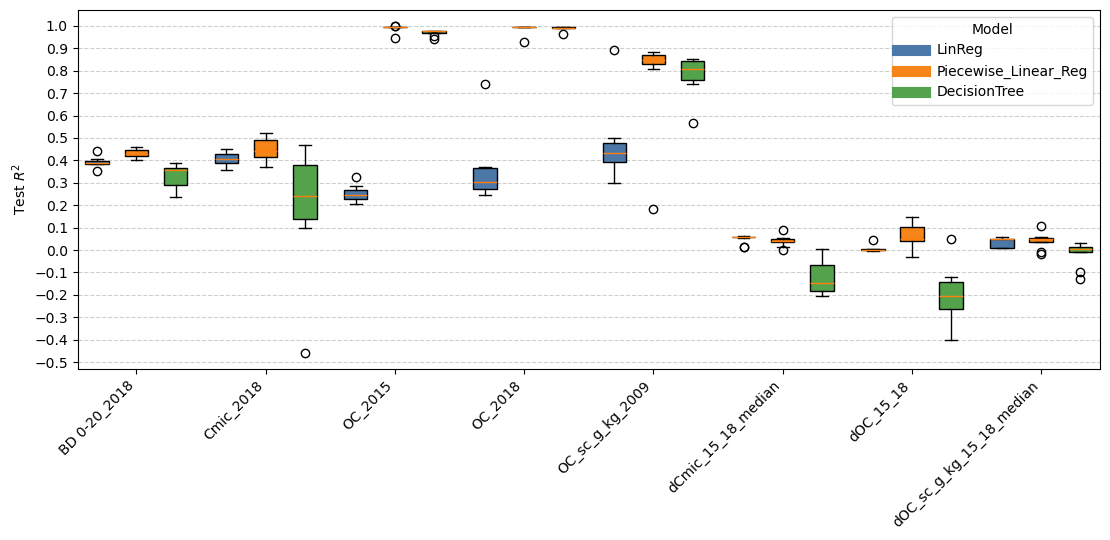

In [34]:
# boxplot of predictions
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

pkl_files = sorted(glob.glob("5_results/5_*_results.pkl"))
models = ["LinReg", "Piecewise_Linear_Reg", "DecisionTree"]

box_data = []
positions = []
labels = []

group_gap = 0.3
for i, file_path in enumerate(pkl_files):
    df = pd.read_pickle(file_path)
    base_name = os.path.basename(file_path)
    cleaned = base_name
    if cleaned.startswith("5_"):
        cleaned = cleaned[2:]
    if cleaned.endswith("_results.pkl"):
        cleaned = cleaned[:-12]
    labels.append(cleaned)
    for j, model in enumerate(models):
        values = df.loc[df["model_type"] == model, "test_R2"].dropna()
        box_data.append(values)
        positions.append(i * (len(models) + group_gap) + j)

fig, ax = plt.subplots(figsize=(max(6, len(pkl_files) * 1.4), 5.5))
box = ax.boxplot(
    box_data,
    positions=positions,
    widths=0.6,
    patch_artist=True,
)

colors = ["#4C78A8", "#F58518", "#54A24B"]
for patch, color in zip(box["boxes"], colors * len(pkl_files)):
    patch.set_facecolor(color)

centers = [i * (len(models) + group_gap) + (len(models) - 1) / 2 for i in range(len(pkl_files))]
ax.set_xticks(centers)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel("Test $R^2$")

legend_handles = [
    plt.Line2D([0], [0], color=color, lw=8) for color in colors
]
ax.legend(
    legend_handles,
    models,
    title="Model",
    loc="upper right",
)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="y", which="major", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("figures/boxplot_models_by_pkl.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
# line plots of adaptability
# histograms of underdetermination (Qmax)
# scatter plots of equfinality (Qmax vs. CUE)
# SOC vs. CUE
# Qmax vs. Kat & Breure